In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

136.72461171968789 39.10007600987972
257.9303205657263 55.499371745979005
100.425912552521 33.29974996320255


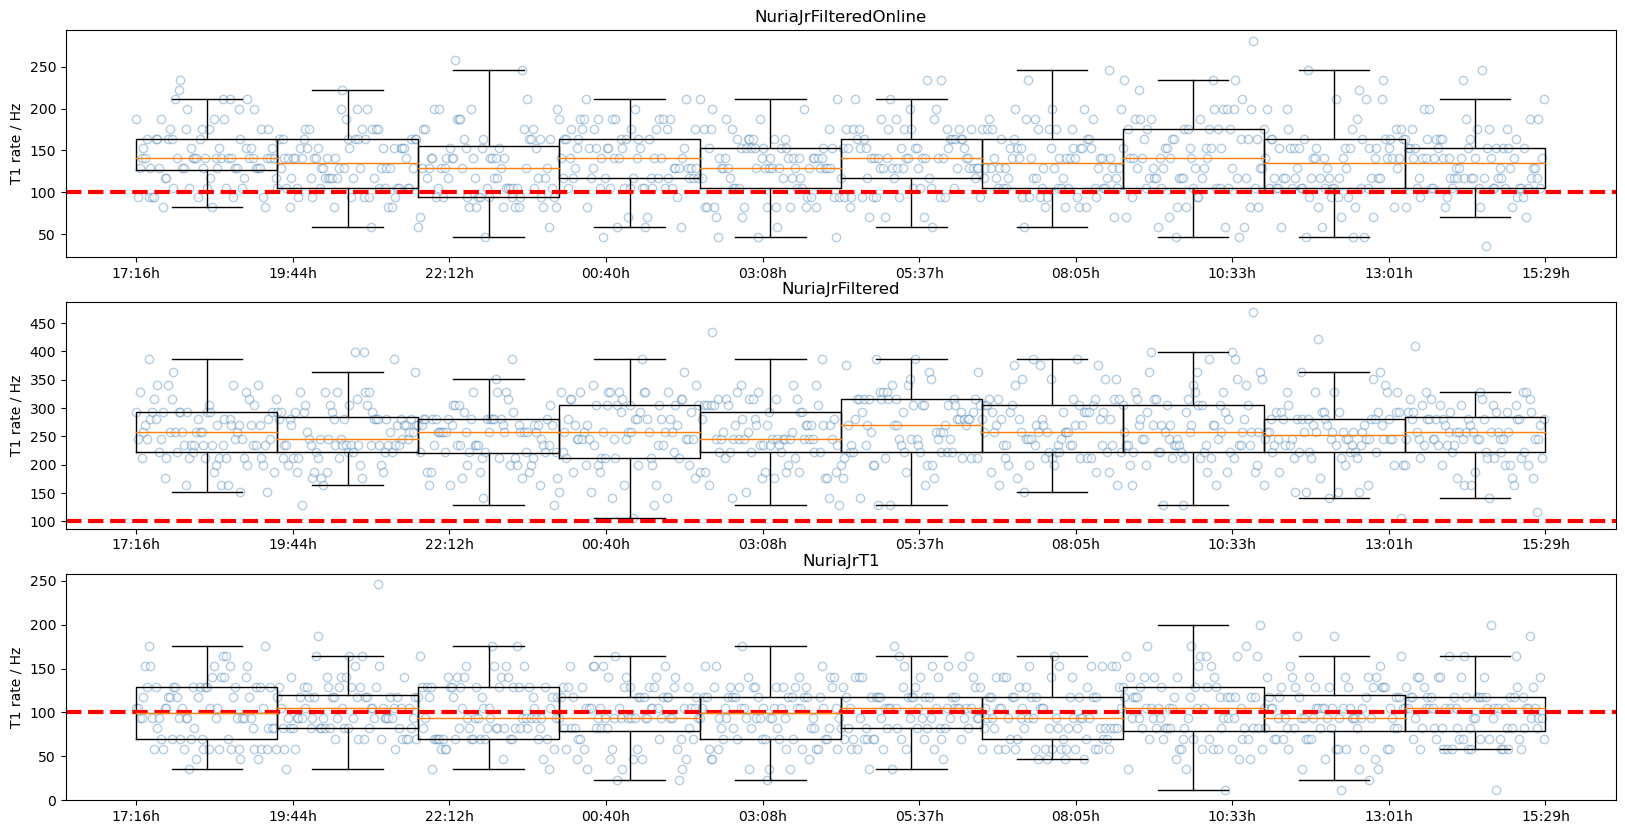

In [4]:
plt.rcParams["figure.figsize"] = [20, 10]
fig, axes = plt.subplots(3, 1)


for ax, station in zip(axes, ["NuriaJrFilteredOnline", "NuriaJrFiltered", "NuriaJrT1"]):
    violins = []

    root_path = f"/cr/tempdata01/filip/SSDCalib/WCDT1Calib/Nov2022/{station}/"
    for file in os.listdir(root_path):
        violins.append(sum(np.loadtxt(root_path + file)) / (8.33e-9 * 2048 * 5000))

    ax.scatter(
        range(len(violins)),
        violins,
        facecolor="white",
        edgecolors="steelblue",
        alpha=0.4,
    )

    print(np.mean(violins), np.std(violins))

    combine = 80
    indices = np.arange(0, 799, combine)
    violins = np.split(np.array(violins), indices)
    positions = [combine] + [int(i + 0.5 * combine) for i in indices]

    ax.boxplot(violins, positions=positions, widths=combine, showfliers=False)
    ax.axhline(100, c="r", ls="--", lw=3)
    # _ = plt.violinplot(violins, range(50, 849, 100), vert = True, showmeans = True)
    ax.set_title(station)

    # timing information
    timestamps = np.loadtxt(
        f"/cr/tempdata01/filip/UubRandoms/Nov2022/converted/timestamps/NuriaJr.dat",
        dtype=str,
    )
    start = int(timestamps[np.where(timestamps[:, 0] == "randoms0000.dat")[0][0]][1])
    stop = int(timestamps[np.where(timestamps[:, 0] == "randoms0799.dat")[0][0]][1])
    xticks = np.linspace(start, stop, 10)

    ax.set_ylabel("T1 rate / Hz")
    ax.set_xticks(
        np.linspace(0, len(os.listdir(root_path)), 10),
        [datetime.datetime.fromtimestamp(x).strftime("%H:%Mh") for x in xticks],
    )

In [30]:
flat_violins = [l for p in violins for l in p]
files = os.listdir("/cr/tempdata01/filip/SSDCalib/WCDT1Calib/Nov2022/SvenjaT1/")
print(files[0], (np.array(flat_violins) * (8.33e-9 * 2048 * 5000))[1])

randoms0009_WCD.dat 18.0
